<a href="https://colab.research.google.com/github/Theophilus-Baidoo/PublishersForumCodes/blob/main/Cervical_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
####### Remove Warnings from the code #######
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

######## Import all necessity functions for machine Learning ########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:

data = pd.read_csv("/content/drive/MyDrive/risk_factors_cervical_cancer.csv")
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
#data.dtypes

In [ ]:
#data.columns

In [ ]:
data.replace("?",pd.NA,inplace=True)

In [ ]:
total_missing_values = data.isnull().sum().sum()
print(f"Total missing:{total_missing_values}")

Total missing:3622


In [ ]:
missing_percentage=data.isnull().mean()*100
columns_to_drop=missing_percentage[missing_percentage > 70].index

In [ ]:
data_cleaned=data.drop(columns=columns_to_drop)
print(f"Dropped colums: {columns_to_drop.tolist()}")

Dropped colums: ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']


In [ ]:
data_cleaned.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,<NA>,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,<NA>,1.0,1.266972909,2.8,0.0,0.0,<NA>,...,0.0,0,0,0,0,0,0,0,0,0


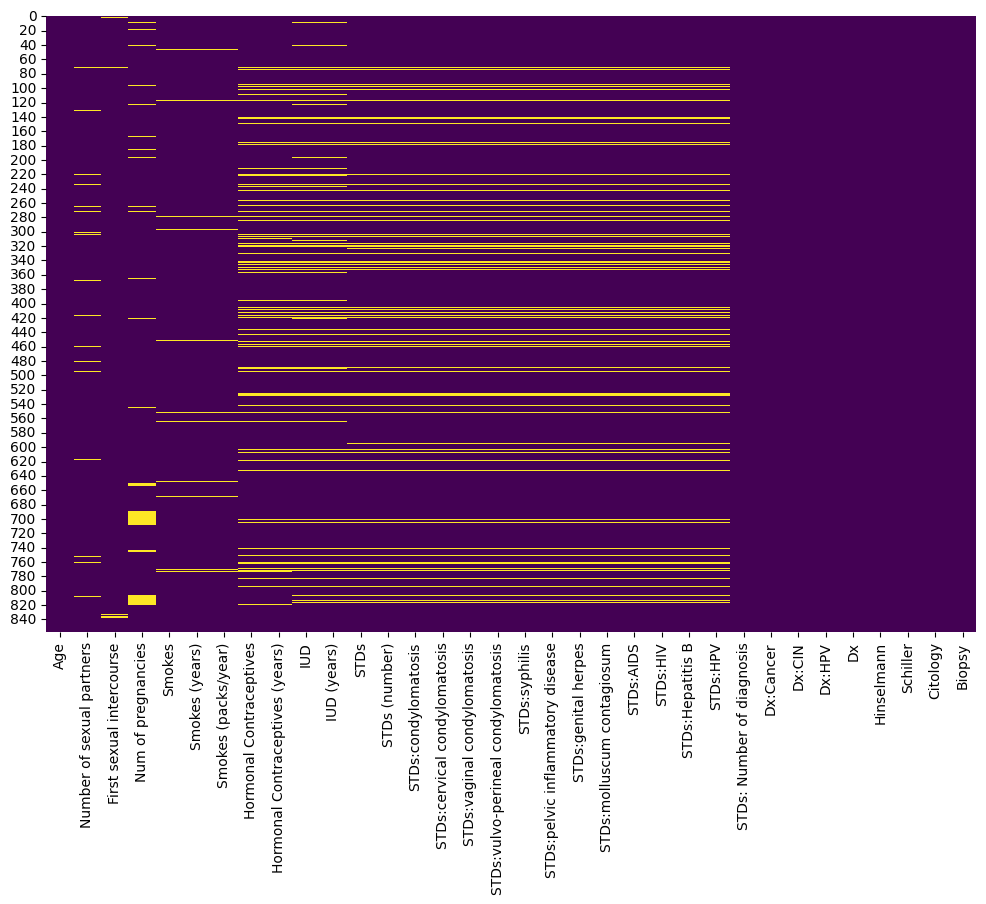

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_cleaned.isnull(),cbar=False,cmap='viridis')
plt.show()

In [ ]:
missing_values=data_cleaned.isna().sum()
missing_values

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
data_cleaned['Number of sexual partners']=pd.to_numeric(data_cleaned['Number of sexual partners'],errors='coerce')
data_cleaned['First sexual intercourse']=pd.to_numeric(data_cleaned['First sexual intercourse'],errors='coerce')
data_cleaned['Num of pregnancies']=pd.to_numeric(data_cleaned['Num of pregnancies'],errors='coerce')
data_cleaned['Smokes (years)']=pd.to_numeric(data_cleaned['Smokes (years)'],errors='coerce')
data_cleaned['Smokes (packs/year)']=pd.to_numeric(data_cleaned['Smokes (packs/year)'],errors='coerce')
data_cleaned['Hormonal Contraceptives (years)']=pd.to_numeric(data_cleaned['Hormonal Contraceptives (years)'],errors='coerce')
#data_cleaned['First sexual intercourse']=pd.to_numeric(data_cleaned['First sexual intercourse'],errors='coerce')
data_cleaned['IUD (years)']=pd.to_numeric(data_cleaned['IUD (years)'],errors='coerce')
data_cleaned['STDs (number)']=pd.to_numeric(data_cleaned['STDs (number)'],errors='coerce')

In [ ]:
#numeric_cols_with_na=data_cleaned.select_dtypes(include=['number']).columns[data_cleaned.select_dtypes(include=['number']).isna().any()].tolist()

In [ ]:
#Mean imputation
columns_to_convert = ['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
                      'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']

for col in columns_to_convert:
  data_cleaned[col].fillna(data_cleaned[col].mean(),inplace=True)

In [ ]:
#Mode Imputation
column_to_convert = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
                     'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS',
                     'STDs:HIV','STDs:Hepatitis B','STDs:HPV']
for col in column_to_convert:
  mode_value = data_cleaned[col].mode().iloc[0]
  data_cleaned[col].fillna(mode_value,inplace=True)

In [ ]:
missing_values=data_cleaned.isna().sum()
missing_values

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
data_cleaned.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
columns=  ['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
                      'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
for col in columns:
  data_cleaned[col]=data_cleaned[col].astype(int)

In [ ]:
# colu = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
#                      'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS',
#                      'STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV','Dx']
# for col in colu:
#   data_cleaned[col]=data_cleaned[col].astype(bool)

In [ ]:
colu = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis',
                     'STDs:syphilis','STDs:pelvic inflammatory disease','STDs:genital herpes','STDs:molluscum contagiosum','STDs:AIDS',
                     'STDs:HIV','STDs:Hepatitis B','STDs:HPV','Dx:Cancer','Dx:CIN','Dx:HPV','Dx']
for col in colu:
  data_cleaned[col]=data_cleaned[col].astype(float).astype(int)

In [ ]:
print(data_cleaned.dtypes)

Age                                   int64
Number of sexual partners             int64
First sexual intercourse              int64
Num of pregnancies                    int64
Smokes                                int64
Smokes (years)                        int64
Smokes (packs/year)                   int64
Hormonal Contraceptives               int64
Hormonal Contraceptives (years)       int64
IUD                                   int64
IUD (years)                           int64
STDs                                  int64
STDs (number)                         int64
STDs:condylomatosis                   int64
STDs:cervical condylomatosis          int64
STDs:vaginal condylomatosis           int64
STDs:vulvo-perineal condylomatosis    int64
STDs:syphilis                         int64
STDs:pelvic inflammatory disease      int64
STDs:genital herpes                   int64
STDs:molluscum contagiosum            int64
STDs:AIDS                             int64
STDs:HIV                        

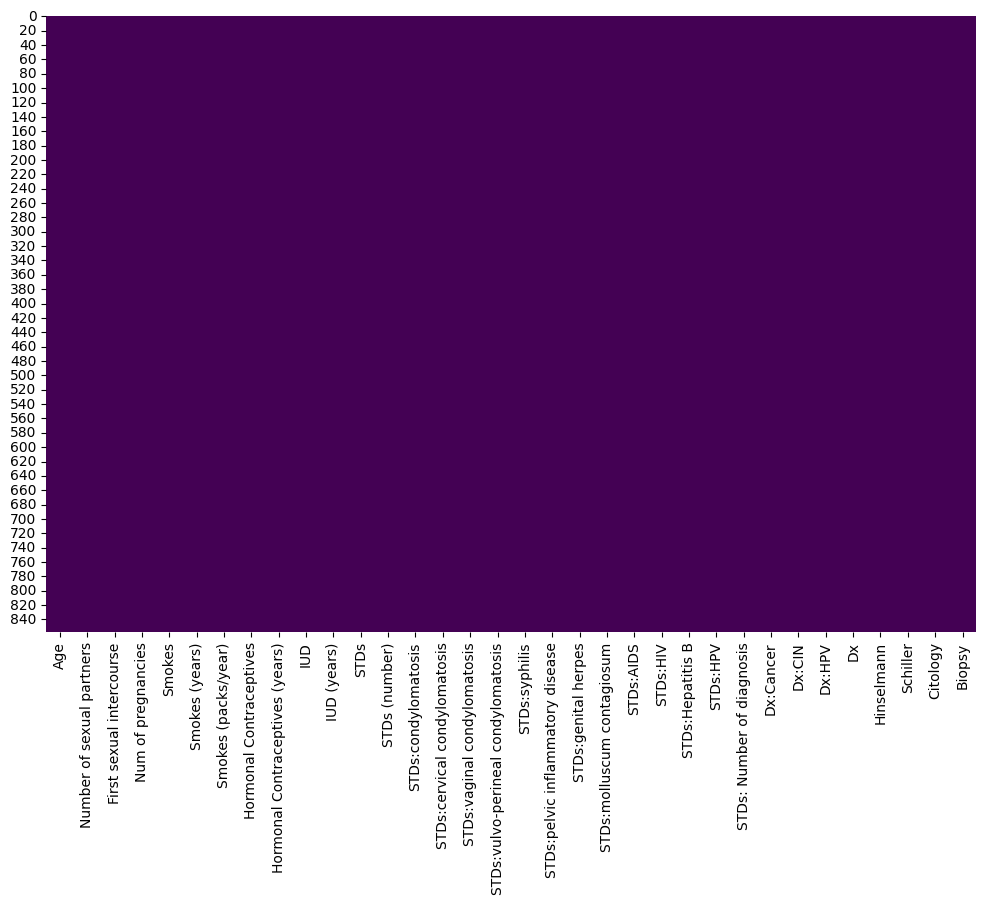

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data_cleaned.isnull(),cbar=False,cmap='viridis')
plt.show()

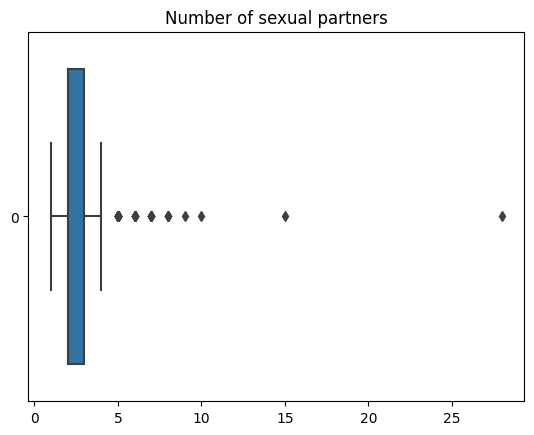

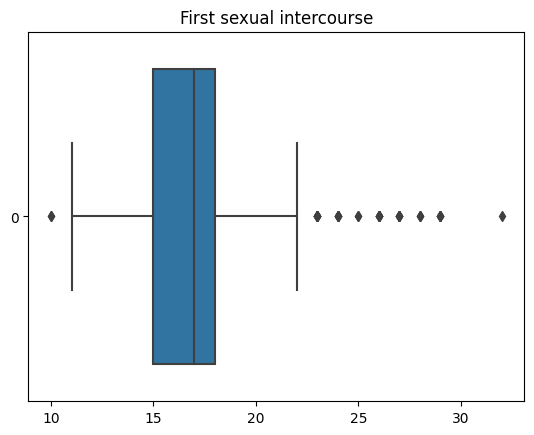

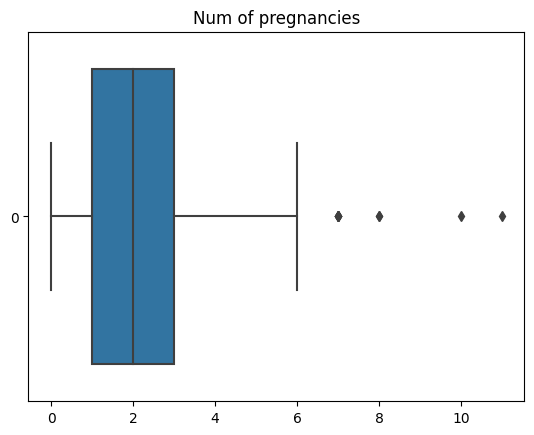

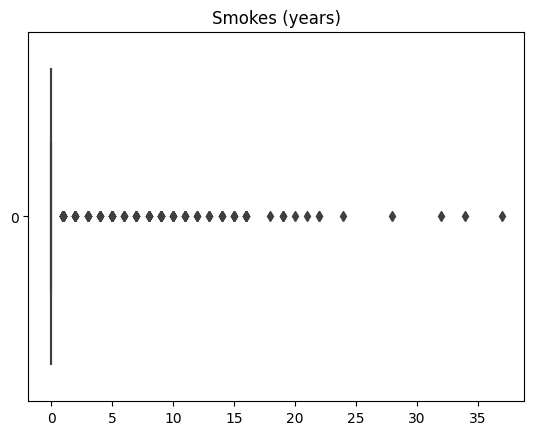

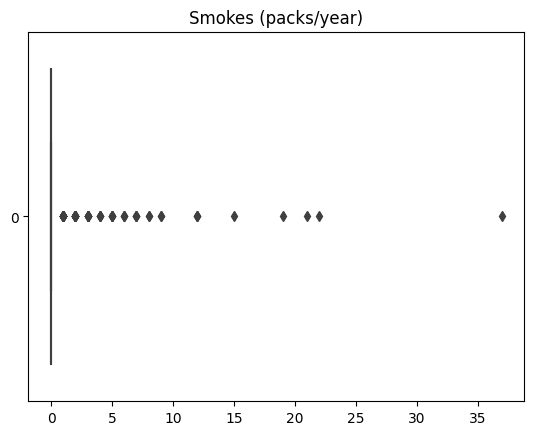

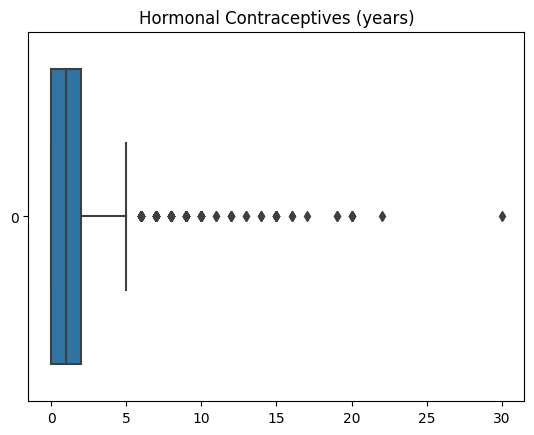

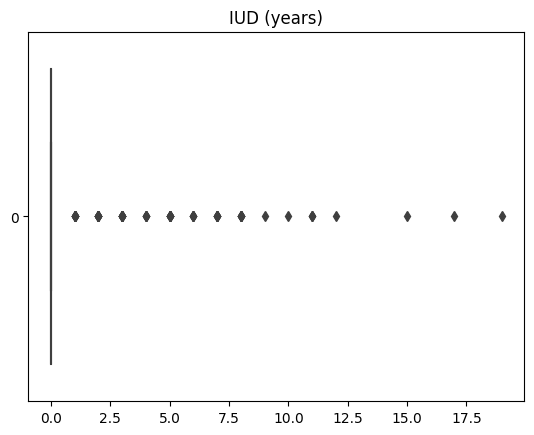

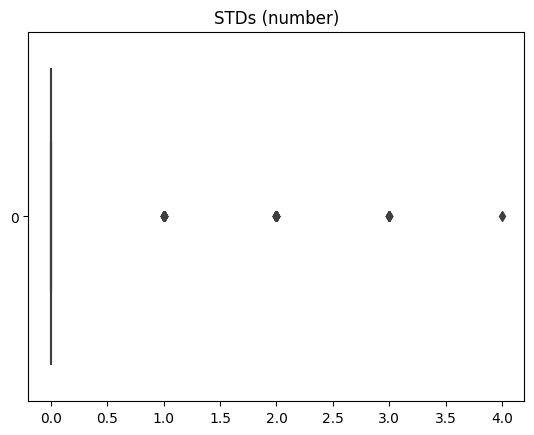

In [ ]:
#checking for outliers
hist =  ['Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
                      'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
for col in hist:
  sns.boxplot(data_cleaned[col], orient='h')
  plt.title(col)
  plt.show()

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


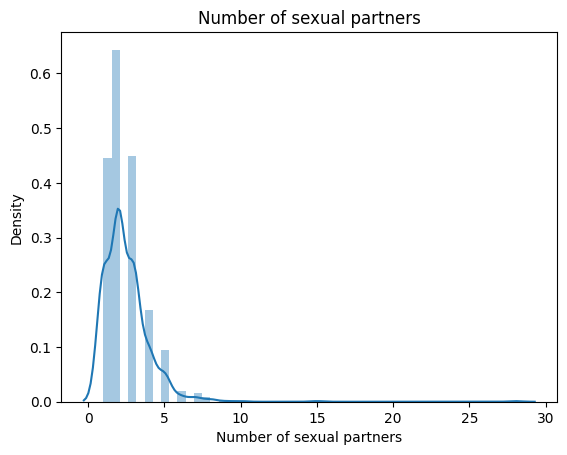

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


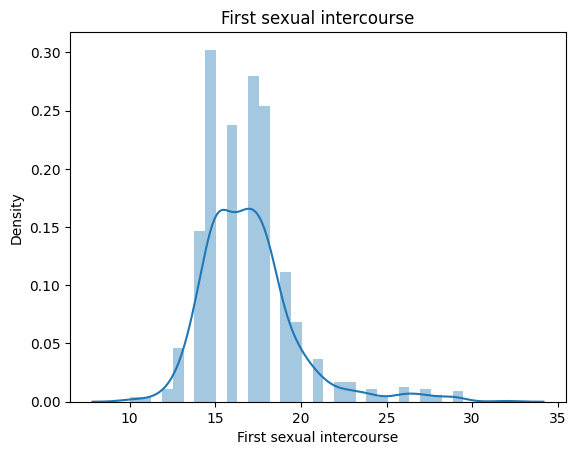

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


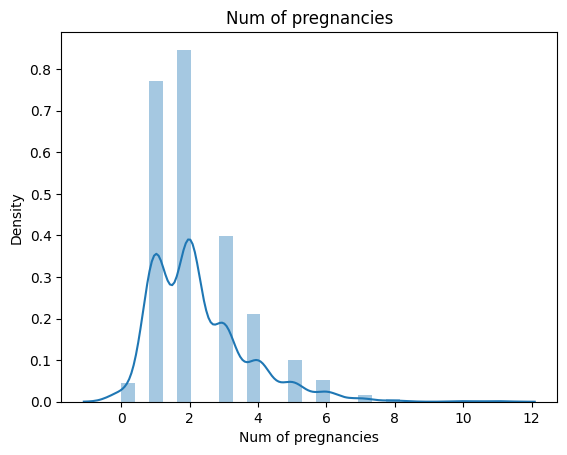

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


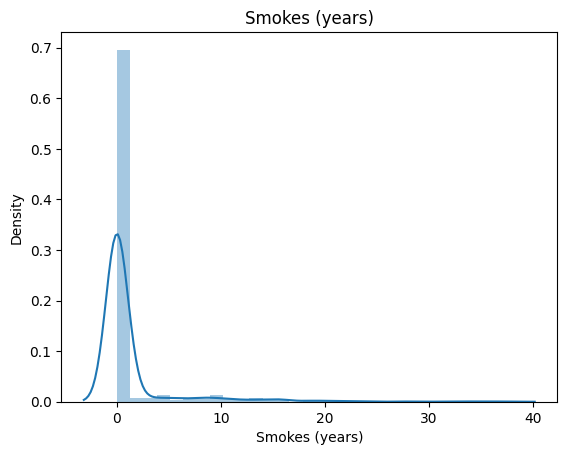

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


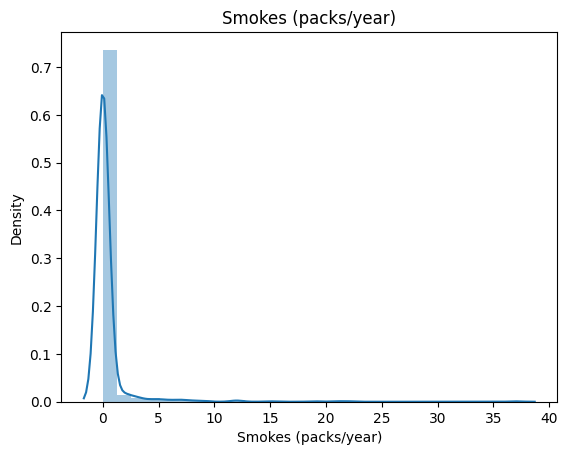

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


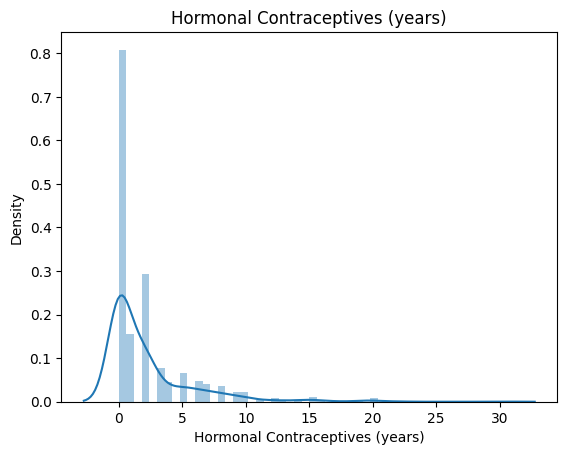

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


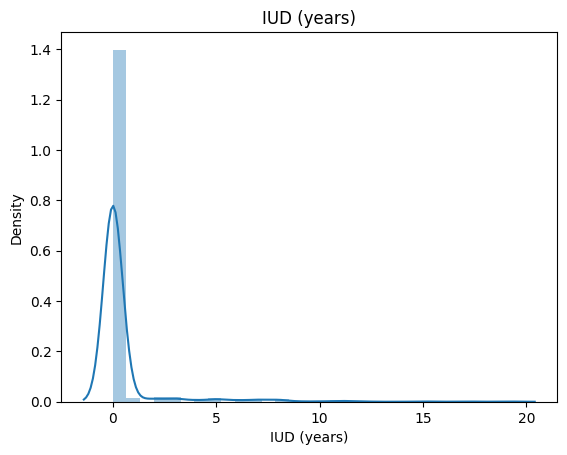

<ipython-input-81-8bf57e34adff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[col],kde=True)


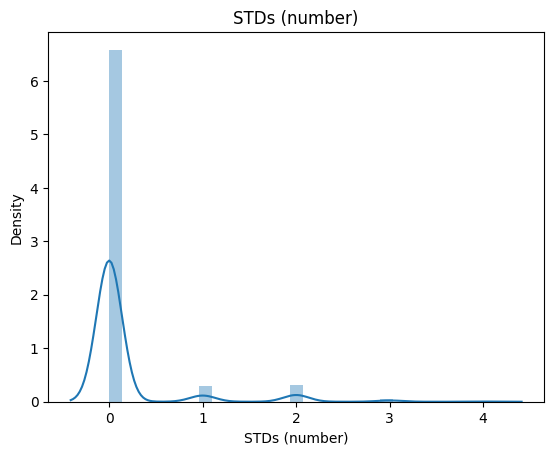

In [ ]:
for col in hist:
  sns.distplot(data_cleaned[col],kde=True)
  plt.title(col)
  plt.show()

In [ ]:
#data_cleanedd = data_cleaned.select_dtypes(exclude='bool')

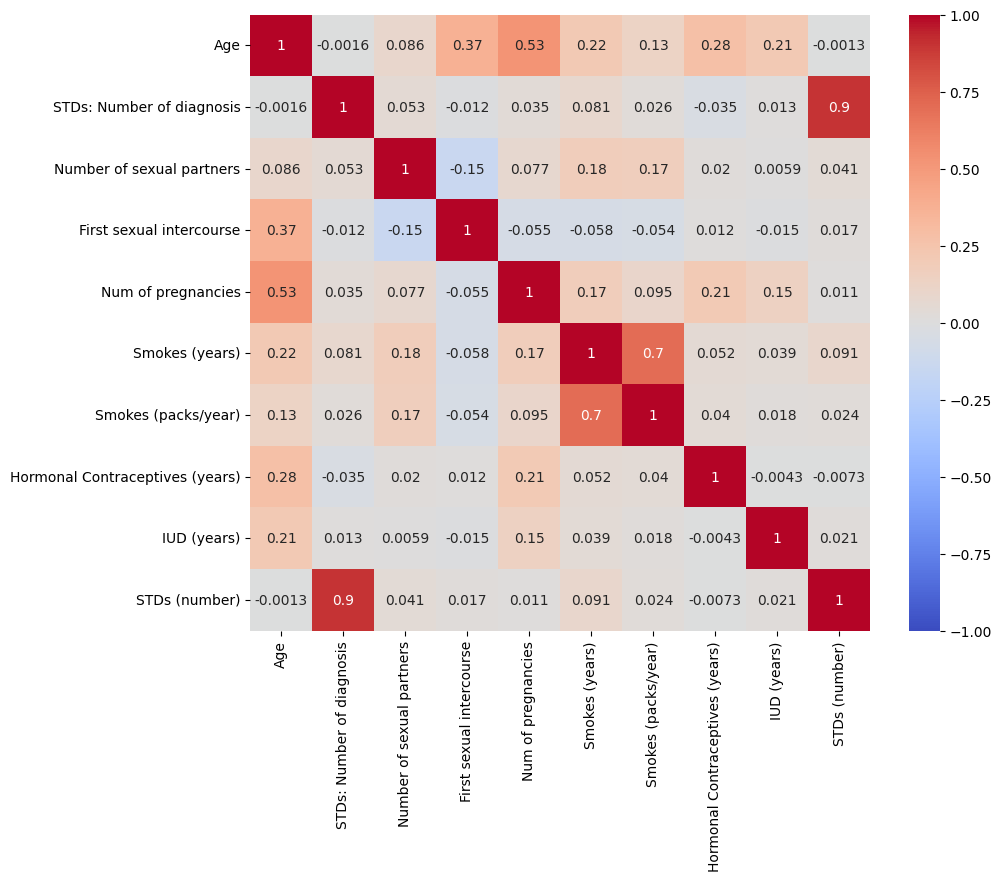

In [ ]:
from pandas.io.formats.style import Subset
#Correlation matrix
colus=  ['Age','STDs: Number of diagnosis','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)',
                      'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
Subset=data_cleaned[colus]
corr = Subset.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()


In [ ]:
print(data_cleaned.dtypes)

Age                                   int64
Number of sexual partners             int64
First sexual intercourse              int64
Num of pregnancies                    int64
Smokes                                int64
Smokes (years)                        int64
Smokes (packs/year)                   int64
Hormonal Contraceptives               int64
Hormonal Contraceptives (years)       int64
IUD                                   int64
IUD (years)                           int64
STDs                                  int64
STDs (number)                         int64
STDs:condylomatosis                   int64
STDs:cervical condylomatosis          int64
STDs:vaginal condylomatosis           int64
STDs:vulvo-perineal condylomatosis    int64
STDs:syphilis                         int64
STDs:pelvic inflammatory disease      int64
STDs:genital herpes                   int64
STDs:molluscum contagiosum            int64
STDs:AIDS                             int64
STDs:HIV                        

In [ ]:
data_cleaned = data_cleaned.drop("Hinselmann",axis=1)
data_cleaned = data_cleaned.drop("Schiller",axis=1)
data_cleaned = data_cleaned.drop("Citology",axis=1)

In [ ]:
data_cleaned.shape

(858, 31)

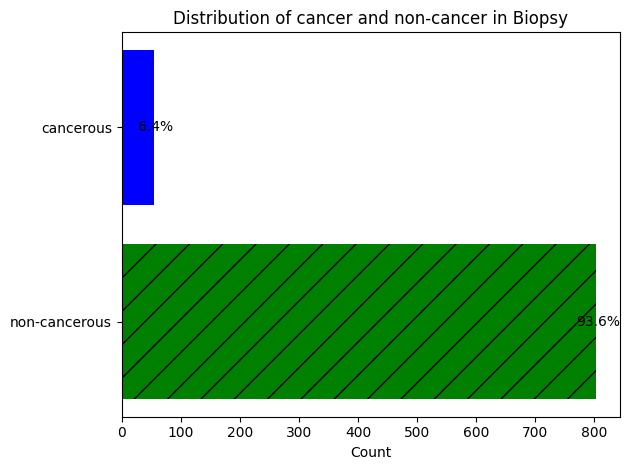

In [ ]:
# Calculate counts
count_zeros = data_cleaned['Biopsy'].value_counts().get(0, 0)
count_ones = data_cleaned['Biopsy'].value_counts().get(1, 0)

percent_zeros = (count_zeros / len(data_cleaned)) * 100
percent_ones = (count_ones / len(data_cleaned)) * 100

# Create a bar plot
labels = ['non-cancerous', 'cancerous']
values = [count_zeros, count_ones]
percentages = [percent_zeros, percent_ones]
colors = ['green', 'blue']

# Create a horizontal bar plot with adjusted percentage positions for '0s' and '1s'
bars = plt.barh(labels, values, color=colors)
bars[0].set_hatch('/')  # Add stripes to the '0s' bar
# bars[1].set_hatch('/')

# Display percentages with conditional positioning
for bar, label, percentage in zip(bars, labels, percentages):
    if label == '0s':
        plt.text(bar.get_width() - 5,  # Inside the bar for '0s'
                 bar.get_y() + bar.get_height() / 2,
                 f'{percentage:.1f}%',
                 ha='center',
                 va='center',
                 color='white',
                 fontweight='bold')
    else:
        plt.text(bar.get_width() + 3,  # Outside the bar for '1s'
                 bar.get_y() + bar.get_height() / 2,
                 f'{percentage:.1f}%',
                 ha='center',
                 va='center')

plt.xlabel('Count')
plt.title('Distribution of cancer and non-cancer in Biopsy')
plt.tight_layout()
plt.show()


In [ ]:
data_cleaned.dtypes

Age                                   int64
Number of sexual partners             int64
First sexual intercourse              int64
Num of pregnancies                    int64
Smokes                                int64
Smokes (years)                        int64
Smokes (packs/year)                   int64
Hormonal Contraceptives               int64
Hormonal Contraceptives (years)       int64
IUD                                   int64
IUD (years)                           int64
STDs                                  int64
STDs (number)                         int64
STDs:condylomatosis                   int64
STDs:cervical condylomatosis          int64
STDs:vaginal condylomatosis           int64
STDs:vulvo-perineal condylomatosis    int64
STDs:syphilis                         int64
STDs:pelvic inflammatory disease      int64
STDs:genital herpes                   int64
STDs:molluscum contagiosum            int64
STDs:AIDS                             int64
STDs:HIV                        

In [ ]:
# pip install boruta

In [ ]:
X=data_cleaned.drop('Biopsy',axis=1)#.values
y=data_cleaned['Biopsy']#.values.ravel()

In [ ]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,1,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,0,0,0,0,1,0,1,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Biopsy, Length: 858, dtype: int64

In [ ]:
#Min_Max Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
####### Scaling the dataset using Standard scaler #########
standard_scaler_ = StandardScaler()
X = standard_scaler_.fit_transform(X)


In [ ]:
####### split the dataset into train and test ########
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
print("Total number of patients:", data_cleaned.shape[0])
print("Total number of patients in training set:", X_train.shape[0])
#print("Total number of patients in validation set:", X_val.shape[0])
print("Total number of patients in test set:", X_test.shape[0])

Total number of patients: 858
Total number of patients in training set: 600
Total number of patients in test set: 258


In [ ]:
from collections import Counter
print('Before ADASYN:',Counter(y_train))

Before ADASYN: Counter({0: 560, 1: 40})


In [ ]:
from collections import Counter
print('Before ADASYN:',Counter(y_train))

Before ADASYN: Counter({0: 560, 1: 40})


In [ ]:
####### Convert imbalanced dataset to balanced ########
from imblearn.over_sampling import RandomOverSampler, SMOTE, SVMSMOTE, ADASYN, BorderlineSMOTE
adasyn_ = ADASYN(random_state = 42, n_neighbors = 3)
X_train_adasyn, y_train_adasyn = adasyn_.fit_resample(X_train.values, y_train.values.ravel())
#X.shape, y.shape

In [ ]:
###### moses ######
####### Convert imbalanced dataset to balanced ########

from imblearn.over_sampling import RandomOverSampler, SMOTE, SVMSMOTE, ADASYN, BorderlineSMOTE
adasyn_ = ADASYN(random_state = 42, n_neighbors = 3)
X_train_adasyn, y_train_adasyn = adasyn_.fit_resample(X_train, y_train.ravel())
#X.shape, y.shape

In [ ]:
from collections import Counter
#print('Before SMOTE:',Counter(y_train))
print('After ADASYN:',Counter(y_train_adasyn))
#shuffle
perms=np.random.permutation(X_train_adasyn.shape[0])
X_train_adasyn = X_train_adasyn[perms]
X_train_adasyn = pd.DataFrame(data = X_train_adasyn,columns=X_train.columns)
y_train_adasyn=y_train_adasyn[perms]
y_train=pd.DataFrame(data=y_train_adasyn)

After ADASYN: Counter({1: 575, 0: 560})


In [ ]:
##### moses ######
from collections import Counter
#print('Before SMOTE:',Counter(y_train))
print('After ADASYN:',Counter(y_train_adasyn))
#shuffle
perms=np.random.permutation(X_train_adasyn.shape[0])
X_train_adasyn = X_train_adasyn[perms]
X_train_adasyn = pd.DataFrame(data = X_train_adasyn)
y_train_adasyn=y_train_adasyn[perms]
y_train=pd.DataFrame(data=y_train_adasyn)

After ADASYN: Counter({1: 570, 0: 560})


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from boruta import BorutaPy
# from sklearn.model_selection import KFold


In [ ]:
# import numpy as np
# X_train = np.array(X_train)
# y_train = np.array(y_train)

In [ ]:
# rf=RandomForestClassifier(n_jobs=-1,class_weight='balanced',max_depth=5)
# boruta_feature_selector = BorutaPy(rf, random_state=42,max_iter=60, perc=100, verbose =2)
# boruta_feature_selector.fit(X_train,y_train)

In [ ]:
# rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# selected_features_counts = dict()
# feature_importances = pd.DataFrame(index=data_cleaned.drop('Biopsy', axis=1).columns)

# for idx, (train_index, _) in enumerate(kf.split(X_train)):
#     X_train_fold = X_train[train_index]
#     y_train_fold = y_train[train_index]

#     boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42, max_iter=100, perc=100)
#     boruta_selector.fit(X_train_fold, y_train_fold)

#     for feature, selected in zip(data_cleaned.drop('Biopsy', axis=1).columns, boruta_selector.support_):
#         if selected:
#             selected_features_counts[feature] = selected_features_counts.get(feature, 0) + 1

#     # Store feature ranks
#     feature_importances[f'fold_{idx + 1}'] = boruta_selector.ranking_

# # Get confirmed features based on majority voting
# confirmed_features = [feature for feature, count in selected_features_counts.items() if count > (kf.get_n_splits() // 2)]

# print("Confirmed Features:", confirmed_features)

# # Plot confirmed features (assuming they all have rank 1)
# plt.figure(figsize=(10, len(confirmed_features) // 2))
# plt.barh(confirmed_features, [1] * len(confirmed_features))
# plt.xlabel('Importance Rank (Lower is Better)')
# plt.ylabel('Features')
# plt.title('Confirmed Features using Boruta with K-Fold CV')
# plt.show()

In [ ]:
# import boruta
# rf=RandomForestClassifier(n_jobs=-1,class_weight='balanced',max_depth=5)
# #kf=KFold(n_splits=10,shuffle=True, random_state=42)

# # selected_features_counts = dict ()
# #tentative_features_counts = dict ()
# # feature_importances=pd.DataFrame(index=data_cleaned.drop('Biopsy',axis=1).columns)

# # for idx, (train_index, _) in enumerate(kf.split(X_train)):
# #   X_train_fold=X_train[train_index]
# #   y_train_fold=y_train[train_index]

# boruta_selector = BorutaPy(rf,n_estimators='auto',verbose=0,random_state=42)
# boruta_selector.fit(X_train,y_train)

# selected_features = data_cleaned.drop('Biopsy',axis=1).columns[boruta_selector.support_].tolist()
# feature_ranks = boruta_selector.ranking_

# feature_importances = pd.DataFrame({
#     'feature': data_cleaned.drop('Biopsy', axis=1).columns,
#     'rank': feature_ranks
# })

# # Filter the dataframe for the selected features and sort them
# selected_feature_importances = feature_importances[feature_importances['feature'].isin(selected_features)]
# selected_feature_importances = selected_feature_importances.sort_values(by='rank')

# # Plot the feature importances for the selected features
# plt.figure(figsize=(10, len(selected_features) // 2))
# plt.barh(selected_feature_importances['feature'], selected_feature_importances['rank'])
# plt.xlabel('Importance Rank (Lower is Better)')
# plt.ylabel('Features')
# plt.title('Selected Feature Importances using Boruta')
# plt.show()
#     # if selected:
#     #   selected_features_counts[feature]=selected_features_counts.get(feature,0) + 1

#   # for feature, tentative in zip(data_cleaned.drop('Biopsy',axis=1).columns,boruta_selector.support_weak_):
#   #   if tentative:
#   #     tentative_features_counts[feature] = tentative_features_counts.get(feature, 0) + 1




# # #store feature importance
# # feature_importances[f'fold_{idx + 1}'] = boruta_selector.ranking_
# # feature_importances['average_rank'] = feature_importances.mean(axis=1)

# # selected_features = [feature for feature, counts in selected_features_counts.items() if counts >=1]
# # #filtered_importances = feature_importances.loc[selected_features]
# # #Compute average importance across all folds

# # selected_feature_importances=feature_importances.loc[selected_features].sort_values(by='average_rank')
# # # feature_importances_sorted=feature_importances.sort_values(by='average_rank')

# # #sort features
# #filtered_importances['average_rank'] = filtered_importances.sort_values(by='average_rank')

In [ ]:
# #Plot feature importance
# plt.figure(figsize=(10,len(selected_features) //2))
# selected_feature_importances['average_rank'].plot(kind='barh',color='green',label='Ranking')
# plt.xlabel('Average Importance Rank (Lower is Better)')
# plt.ylabel('Features')
# plt.title('Feature Importances over 5 CV folds using Boruta')
# plt.show()

In [ ]:
# selected_features = [feature for feature, counts in selected_features_counts.items() if counts >=1]
# tentative_features = [feature for feature, counts in tentative_features_counts.items() if counts >=1]

In [ ]:
# print(f"Selected Features (occured in 3 or more fold):{selected_features}")
# print(f"Tentative Features (occured in 3 or more fold):{tentative_features}")

In [ ]:
from sklearn.feature_selection import RFECV
from  sklearn.model_selection import StratifiedKFold

In [ ]:
random_seed = 1234

rfecv_rf = RFECV(
    estimator = RandomForestClassifier(random_state=random_seed),
    step=1,
    cv=StratifiedKFold(5,random_state=random_seed,shuffle=True),
    scoring="accuracy",
    min_features_to_select=1,
    n_jobs=2)

rfecv_rf.fit(X_train_adasyn, y_train_adasyn)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
      estimator=RandomForestClassifier(random_state=1234), n_jobs=2,
      scoring='accuracy')

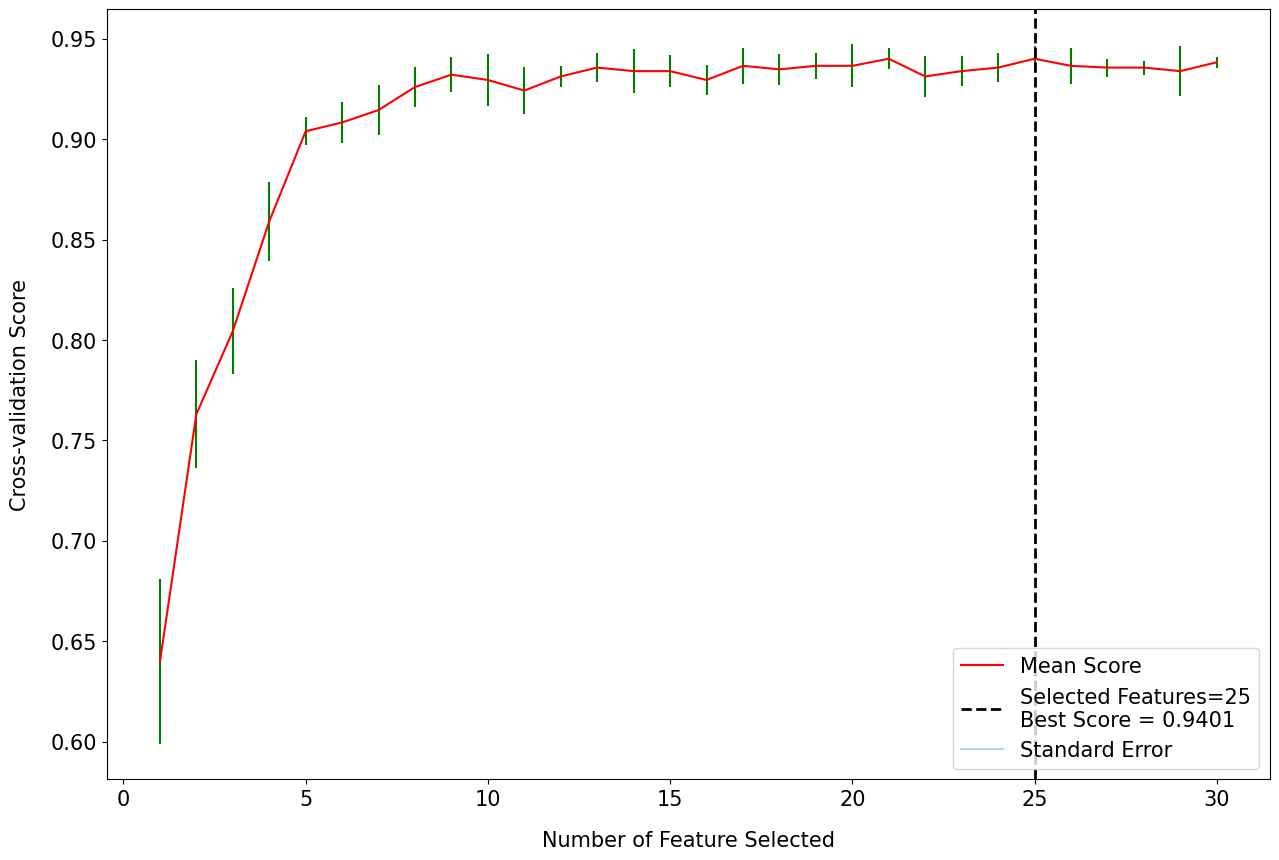

In [ ]:
selected_features_rf = X_train_adasyn.columns[rfecv_rf.support_]
n_scores_rf = len(rfecv_rf.cv_results_["mean_test_score"])
bs = round(np.max(rfecv_rf.cv_results_["mean_test_score"]),4)

plt.figure(figsize=(15,10))
plt.xlabel("Number of Feature Selected", fontsize=15,labelpad=15)
plt.ylabel("Cross-validation Score",fontsize=15, labelpad=15)

plt.errorbar(
    range(rfecv_rf.min_features_to_select,n_scores_rf + rfecv_rf.min_features_to_select),
    rfecv_rf.cv_results_["mean_test_score"],
    yerr=rfecv_rf.cv_results_["std_test_score"],
    fmt= ' ',ecolor="green", color='blue')

plt.plot(
    range(rfecv_rf.min_features_to_select,
          n_scores_rf + rfecv_rf.min_features_to_select),
          rfecv_rf.cv_results_["mean_test_score"],
    linestyle = '-', marker='',markersize=5,color="red",label='Mean Score')

plt.axvline(x=rfecv_rf.n_features_, color = 'black', ls='--',
            lw=2, label=f'Selected Features={rfecv_rf.n_features_}\nBest Score = {bs}')
plt.xticks(size=15);plt.yticks(size=15)
plt.plot([], [],color='lightblue',label='Standard Error')
plt.legend(fontsize=15,loc='lower right')
plt.show()

In [ ]:
print('SELECTED FEATURES ON RFECV:')
print(selected_features_rf)

SELECTED FEATURES ON RFECV:
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx'],
      dtype='object')


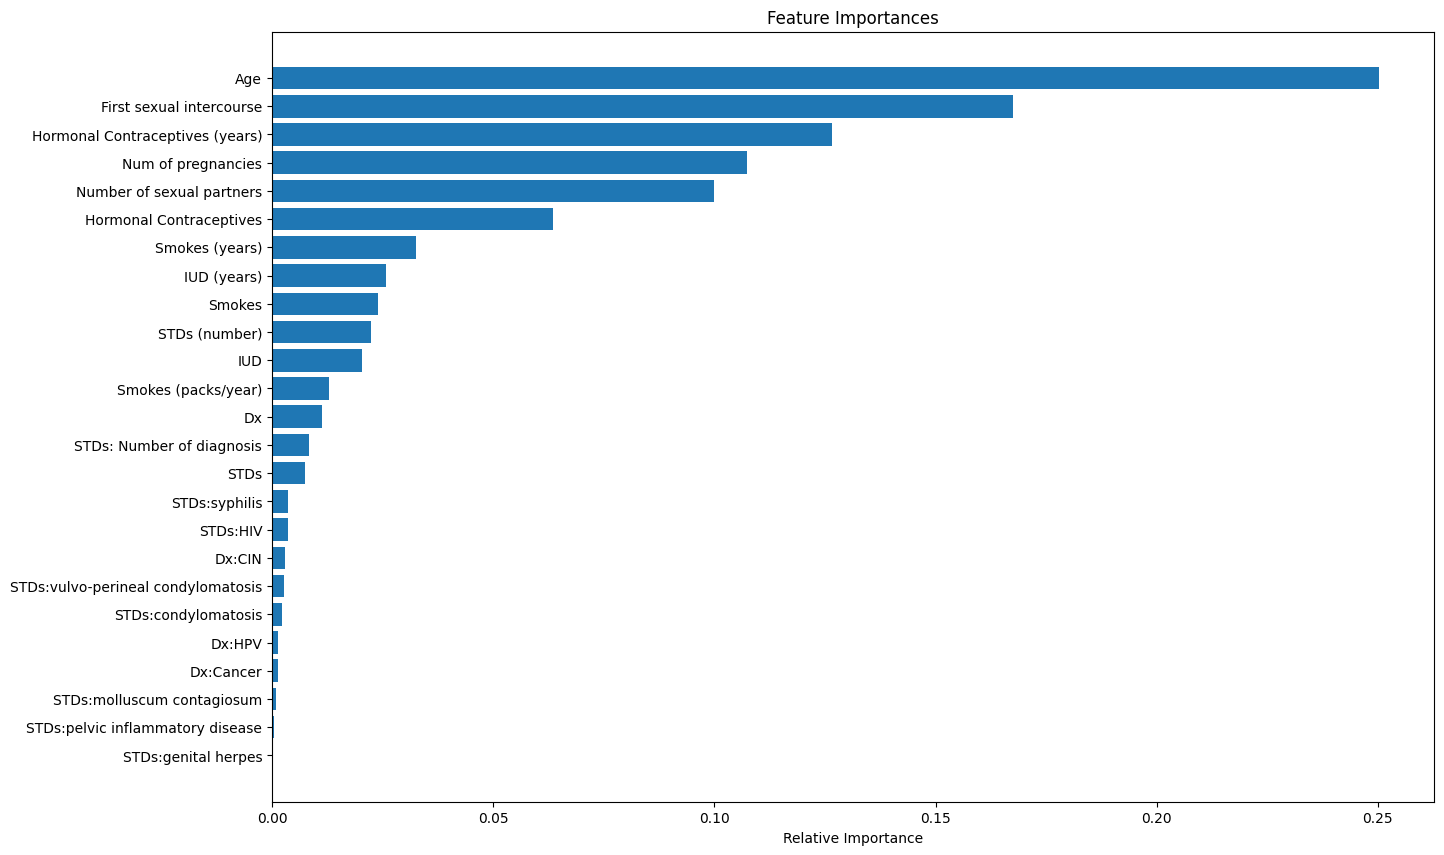

In [ ]:
importances = rfecv_rf.estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [selected_features_rf[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#EXTraTreesClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Instantiate the model
etc = ExtraTreesClassifier(n_jobs=-1, random_state=42,max_features=15, class_weight='balanced')

# Fit the model
etc.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)

# Predict and evaluate
etc_pred = etc.predict(X_test[selected_features_rf])
print(classification_report(y_test,etc_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       243
           1       0.06      0.07      0.06        15

    accuracy                           0.88       258
   macro avg       0.50      0.50      0.50       258
weighted avg       0.89      0.88      0.88       258



In [ ]:
confusion_matrix7 = metrics.confusion_matrix(y_test, etc_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix7, display_labels = [False, True])

plt.figure(figsize=(8, 6))
cm_display.plot()

plt.title('Extra before hyperameter tuning')
plt.show()

NameError: ignored

In [ ]:
# Define the hyperparameters and their possible values
param_dist = {
    'n_estimators': [10, 50, 100, 200, 400],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit to the data
random_search.fit(X_train[selected_features_rf], y_train)

# Best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

ValueError: ignored

In [ ]:
# get the best classifier model after hyper-parameter tuning
print("\nBest Classifier:", random_search.best_estimator_)

In [ ]:
accuracy_scores7 = []
precision_scores7 = []
recall_scores7 = []
f1_scores7 = []
confusion_matrices7 = []

In [ ]:
best_ = random_search.best_estimator_

In [ ]:
# Random Forest with Best Hypertuned Parameters
for i in range(10):
 best_ = best_.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)
 ypred7 = best_forest.predict(X_test[selected_features_rf])
  # Calculate evaluation metrics and append to the respective lists
 accuracy7 = accuracy_score(y_test, ypred7)
 precision7 = precision_score(y_test, ypred7)
 recall7 = recall_score(y_test, ypred7)
 f17 = f1_score(y_test, ypred7)
#  confusion1 = confusion_matrix(y_test, ypred3)

 accuracy_scores7.append(accuracy7)
 precision_scores7.append(precision7)
 recall_scores7.append(recall7)
 f1_scores7.append(f17)

In [ ]:
# Calculate average scores
average_accuracy7 = np.mean(accuracy_scores7)
average_precision7 = np.mean(precision_scores7)
average_recall7 = np.mean(recall_scores7)
average_f17 = np.mean(f1_scores7)

In [ ]:
# Print the average scores and standard deviations
print("Average Accuracy:", average_accuracy7)
print("Average Precision:", average_precision7)
print("Average Recall:", average_recall7)
print("Average F1 Score:", average_f17)

In [ ]:
confusion_matrix8 = metrics.confusion_matrix(y_test, ypred7)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix8, display_labels = [False, True])

plt.figure(figsize=(8, 6))
cm_display.plot()

plt.title('ExtraClassifier after Hyperparameter tuning')
plt.show()

In [ ]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(criterion='gini',max_features=15,n_estimators=26,max_depth=6,class_weight='balanced', random_state = 20)

rfc.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=26,
                       n_estimators=26, random_state=20)

In [ ]:
rfc_pred = rfc.predict(X_test[selected_features_rf])
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       243
           1       0.03      0.13      0.05        15

    accuracy                           0.70       258
   macro avg       0.48      0.43      0.43       258
weighted avg       0.88      0.70      0.78       258

[[178  65]
 [ 13   2]]


In [ ]:
from sklearn import metrics

<Figure size 1200x1000 with 0 Axes>

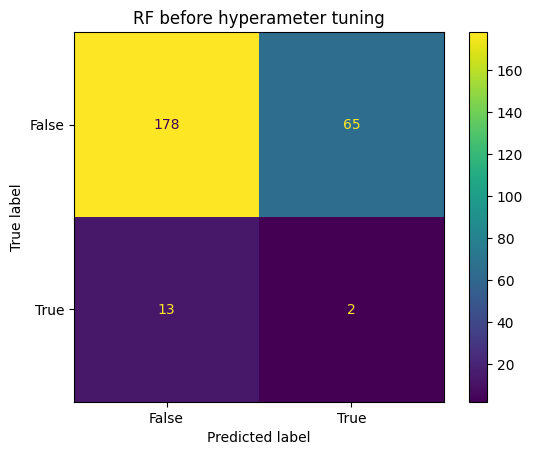

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rfc_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

plt.figure(figsize=(12, 10))
cm_display.plot()

plt.title('RF before hyperameter tuning')
plt.show()

In [ ]:
rn_forest = RandomForestClassifier(criterion='gini',max_features=26,class_weight='balanced', random_state = 20)
#rfc = RandomForestClassifier(criterion='gini',max_features=26,n_estimators=26,max_depth=6,class_weight='balanced', random_state = 20)
# parameters to build the model on
param_grid = {"max_depth": range(1, 10),
#               "max_features": randint(1, 3),
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(200, 500, 1000),
              "bootstrap": [True]}

# Instantiating RandomizedSearchCV object
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5)

# fitting the model for grid search
forest_grid.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)

# get the best parameter from gird search
print("Best Parameters:", forest_grid.best_params_)

# get the best classifier model after hyper-parameter tuning
print("\nBest Classifier:", forest_grid.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 31, 'min_samples_split': 98, 'n_estimators': 200}

Best Classifier: RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=26,
                       min_samples_leaf=31, min_samples_split=98,
                       n_estimators=200, random_state=20)


In [ ]:
accuracy_scores1 = []
precision_scores1 = []
recall_scores1 = []
f1_scores1 = []
confusion_matrices1 = []

In [ ]:
best_forest = forest_grid.best_estimator_

In [ ]:
# Random Forest with Best Hypertuned Parameters
for i in range(10):
 best_forest = best_forest.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)
 ypred3 = best_forest.predict(X_test[selected_features_rf])
  # Calculate evaluation metrics and append to the respective lists
 accuracy1 = accuracy_score(y_test, ypred3)
 precision1 = precision_score(y_test, ypred3)
 recall1 = recall_score(y_test, ypred3)
 f11 = f1_score(y_test, ypred3)
#  confusion1 = confusion_matrix(y_test, ypred3)

 accuracy_scores1.append(accuracy1)
 precision_scores1.append(precision1)
 recall_scores1.append(recall1)
 f1_scores1.append(f11)
#  confusion_matrices1.append(confusion1)

In [ ]:
# Calculate average scores
average_accuracy1 = np.mean(accuracy_scores1)
average_precision1 = np.mean(precision_scores1)
average_recall1 = np.mean(recall_scores1)
average_f11 = np.mean(f1_scores1)

# # Calculate standard deviations
# std_accuracy1 = np.std(accuracy_scores1)
# std_precision1 = np.std(precision_scores1)
# std_recall1 = np.std(recall_scores1)
# std_f11 = np.std(f1_scores1)

In [ ]:
# Print the average scores and standard deviations
print("Average Accuracy:", average_accuracy1)
print("Average Precision:", average_precision1)
print("Average Recall:", average_recall1)
print("Average F1 Score:", average_f11)
# print("Standard Deviation of Accuracy:", std_accuracy1)
# print("Standard Deviation of Precision:", std_precision1)
# print("Standard Deviation of Recall:", std_recall1)
# print("Standard Deviation of F1 Score:", std_f11)

Average Accuracy: 0.6705426356589148
Average Precision: 0.08333333333333334
Average Recall: 0.4666666666666667
Average F1 Score: 0.1414141414141414


In [ ]:
print(classification_report(y_test,ypred3))

              precision    recall  f1-score   support

           0       0.95      0.68      0.80       243
           1       0.08      0.47      0.14        15

    accuracy                           0.67       258
   macro avg       0.52      0.57      0.47       258
weighted avg       0.90      0.67      0.76       258



<Figure size 1200x1000 with 0 Axes>

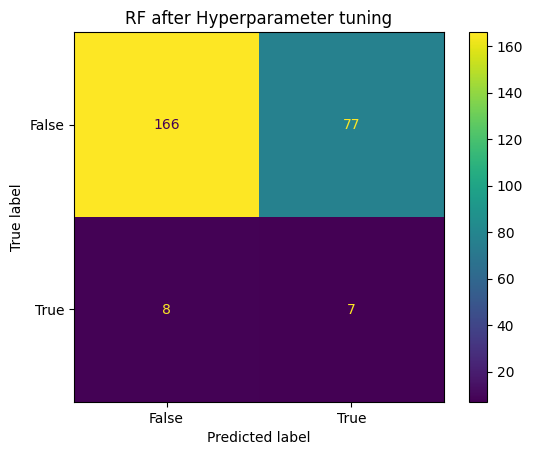

In [ ]:
confusion_matrix1 = metrics.confusion_matrix(y_test, ypred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])

plt.figure(figsize=(12, 10))
cm_display.plot()

plt.title('RF after Hyperparameter tuning')
plt.show()

In [ ]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 20)

xgb = xgb.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)

In [ ]:
xgb_pred = xgb.predict(X_test[selected_features_rf])
cr4=print(classification_report(y_test,xgb_pred))
#print(confusion_matrix(y_test,xgb_pred))
print(cr4)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       243
           1       0.00      0.00      0.00        15

    accuracy                           0.84       258
   macro avg       0.47      0.45      0.46       258
weighted avg       0.88      0.84      0.86       258

None


<Figure size 400x600 with 0 Axes>

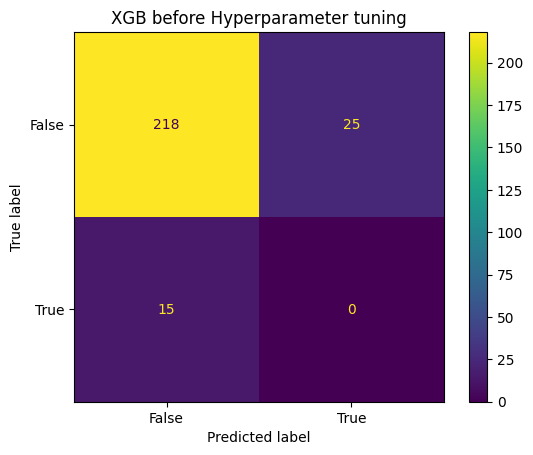

In [ ]:
confusion_matrix2 = metrics.confusion_matrix(y_test, xgb_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

plt.figure(figsize=(4, 6))
cm_display.plot()

plt.title('XGB before Hyperparameter tuning')
plt.show()

In [ ]:
# XGBoost with Parameters
xgb1 = XGBClassifier(n_jobs = -1, random_state = 20)

param_grid = {'max_depth': range(4, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object
xgb_grid = RandomizedSearchCV(xgb1, param_grid,scoring='accuracy', cv = 5)

# fitting the model for grid search
xgb_grid.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)

# get the best parameter from gird search
print("Best Parameters:", xgb_grid.best_params_)

# get the best classifier model after hyper-parameter tuning
print("\nBest Classifier:", xgb_grid.best_estimator_)

Best Parameters: {'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.9, 'colsample_bytree': 0.9}

Best Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=20, ...)


In [ ]:
best_xgb = xgb_grid.best_estimator_

accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
f1_scores2 = []
#confusion_matrices2 = []

In [ ]:
for i in range(10):
  best_xgb.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)
  ypred5 = best_xgb.predict(X_test[selected_features_rf])
  # Calculate evaluation metrics and append to the respective lists
  accuracy2 = accuracy_score(y_test, ypred5)
  precision2 = precision_score(y_test, ypred5)
  recall2 = recall_score(y_test, ypred5)
  f12 = f1_score(y_test, ypred5)
  #confusion2 = confusion_matrix(y_test, ypred5)

  accuracy_scores2.append(accuracy2)
  precision_scores2.append(precision2)
  recall_scores2.append(recall2)
  f1_scores2.append(f12)
  #confusion_matrices2.append(confusion2)

In [ ]:
# Calculate average scores
average_accuracy2 = np.mean(accuracy_scores2)
average_precision2 = np.mean(precision_scores2)
average_recall2 = np.mean(recall_scores2)
average_f12 = np.mean(f1_scores2)

In [ ]:
# Print the average scores and standard deviations
print("Average Accuracy:", average_accuracy2)
print("Average Precision:", average_precision2)
print("Average Recall:", average_recall2)
print("Average F1 Score:", average_f12)

Average Accuracy: 0.7945736434108526
Average Precision: 0.047619047619047616
Average Recall: 0.13333333333333333
Average F1 Score: 0.07017543859649122


<Figure size 600x800 with 0 Axes>

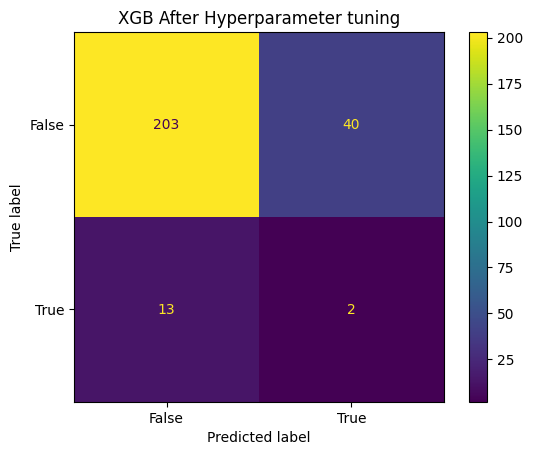

In [ ]:
confusion_matrix3 = metrics.confusion_matrix(y_test, ypred5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

plt.figure(figsize=(6, 8))
cm_display.plot()

plt.title('XGB After Hyperparameter tuning')
plt.show()

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Without hyperparameter tuning
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))
adaboost.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)
y_predd = adaboost.predict(X_test[selected_features_rf])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print(f"Accuracy without hyperparameter tuning: {accuracy_score(y_test, y_predd)}")
cr4=print(classification_report(y_test,y_predd))

In [ ]:
# With hyperparameter tuning using GridSearchCV
param_grid2 = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'base_estimator__max_depth': range (4,40)
}


In [ ]:
grid_search2 = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), param_grid2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search2.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': range(4, 40),
                         'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
# Best parameters and model
best_params = grid_search2.best_params_
best_params


{'base_estimator__max_depth': 2, 'learning_rate': 1, 'n_estimators': 500}

In [ ]:
accuracy_scores3 = []
precision_scores3 = []
recall_scores3 = []
f1_scores3 = []

In [ ]:
best_adaboost = grid_search2.best_estimator_

for i in range(10):
  best_adaboost.fit(X_train_adasyn[selected_features_rf], y_train_adasyn)
  ypred6 = best_adaboost.predict(X_test[selected_features_rf])
  # Calculate evaluation metrics and append to the respective lists
  accuracy3 = accuracy_score(y_test, ypred6)
  precision3 = precision_score(y_test, ypred6)
  recall3 = recall_score(y_test, ypred6)
  f13 = f1_score(y_test, ypred6)
  #confusion2 = confusion_matrix(y_test, ypred5)

  accuracy_scores3.append(accuracy3)
  precision_scores3.append(precision3)
  recall_scores3.append(recall3)
  f1_scores3.append(f13)

In [ ]:
# # LightGBM with Default Parameters
# lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 20)

# lgb.fit(X_train_adasyn[selected_features_rf], y_train_adasyn.values.ravel())

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout
# from tensorflow.keras.activations import relu, sigmoid, softmax, swish
# from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
# from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MSE, MAE, Huber
# from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam, Adamax
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import L1, L2, L1L2

In [ ]:
# from sklearn import metrics
# model = Sequential()

# model.add(Dense(units = 256, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))
# model.add(Dropout(0.6))

# model.add(Dense(units = 128, kernel_initializer = 'he_normal', activation = 'relu', kernel_regularizer = L2()))

# model.add(Dense(units = 64, kernel_initializer = 'he_normal', activation = 'relu'))
# model.add(Dropout(0.4))

# model.add(Dense(units = 1, activation = 'sigmoid'))

# model.compile(optimizer = 'Adam', loss = BinaryCrossentropy(), metrics = ['accuracy'])

# history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 128, verbose = 1)

In [ ]:
# predicted_ = np.where(model.predict(X_test) > 0.5, 1, 0)
# print("accuracy score is  = ", accuracy_score(predicted_, y_test))
# print("recall score is    = ", recall_score(predicted_, y_test))
# print("precision score is = ", precision_score(predicted_, y_test))
# print("f1_score  score is = ", f1_score(predicted_, y_test))


In [ ]:
# plt.plot(history_.history['accuracy'], label = 'train accuracy')
# plt.plot(history_.history['val_accuracy'], label = 'test accuracy')


# plt.plot(history_.history['l'], label = 'train accuracy')
# plt.plot(history_.history['val_accuracy'], label = 'test accuracy')